In [15]:
import sys
print(sys.executable)

import pandas as pd
import matplotlib.pyplot as plt

 
data = pd.read_csv("diabetes.csv")

C:\Users\tugba\anaconda3\python.exe


In [18]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


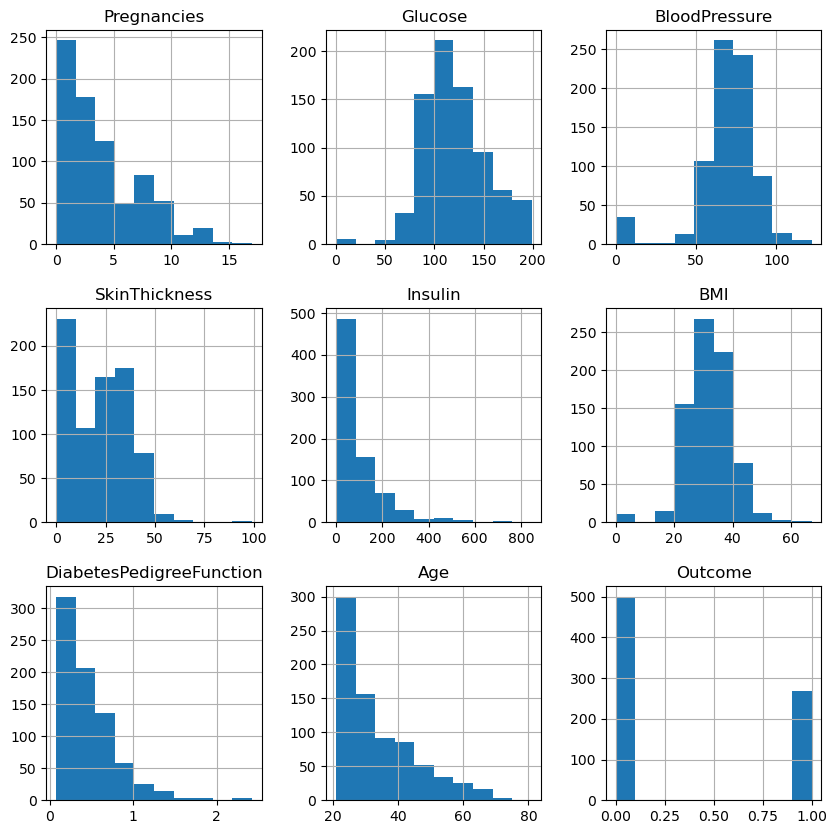

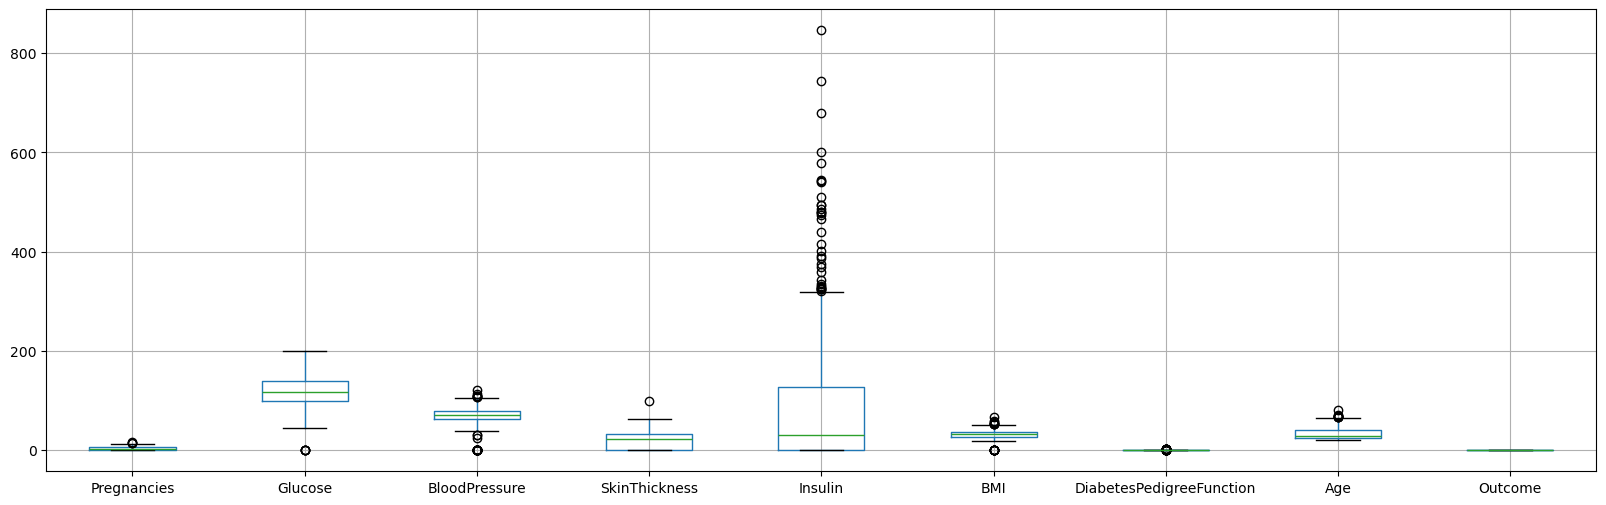

In [19]:
import matplotlib.pyplot as plt
# Histogram
data.hist(figsize=(10, 10))
plt.show()

# Boxplot
data.boxplot(figsize=(20, 6))
plt.show()


In [20]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.info()

NameError: name 'df' is not defined

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Örnek veri yükleme
data = pd.read_csv("diabetes.csv")  # Dosya adını kendi veri setinize göre güncelleyin.

# Özellikler ve hedef değişken ayırma
X = data.drop(columns=["Outcome"])  # Outcome dışındaki tüm sütunlar özelliklerdir.
y = data["Outcome"]  # Hedef değişken Outcome.

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Doğruluk testi
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Skoru: {accuracy:.2f}")


Model Doğruluk Skoru: 0.72


In [10]:
from sklearn.svm import SVC

# Modeli oluştur ve eğit
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# Doğruluk
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7662337662337663


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Karar ağacı modelini tanımla
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Tahmin yap
y_pred = tree_model.predict(X_test)

# Doğruluk
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.7467532467532467


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Her model için sonuçları tutmak
results = {}


Random Forest Confusion Matrix:
[[77 22]
 [21 34]]


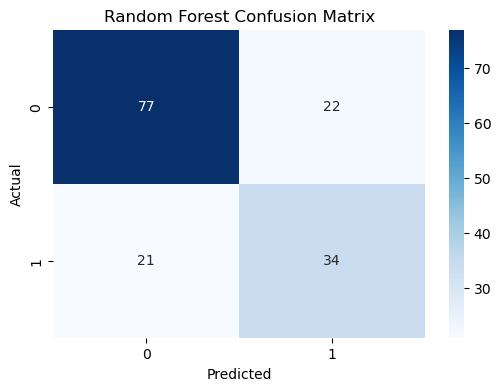

In [13]:
# Random Forest modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin ve doğruluk
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
results["Random Forest"] = rf_accuracy

# Karışıklık matrisi
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM Confusion Matrix:
[[87 12]
 [24 31]]


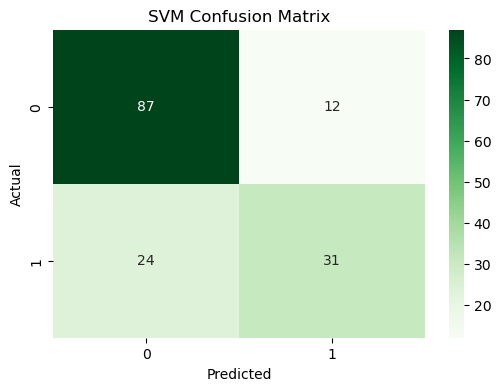

In [14]:
# SVM modeli
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Tahmin ve doğruluk
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
results["SVM"] = svm_accuracy

# Karışıklık matrisi
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("SVM Confusion Matrix:")
print(svm_cm)

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Confusion Matrix:
[[75 24]
 [15 40]]


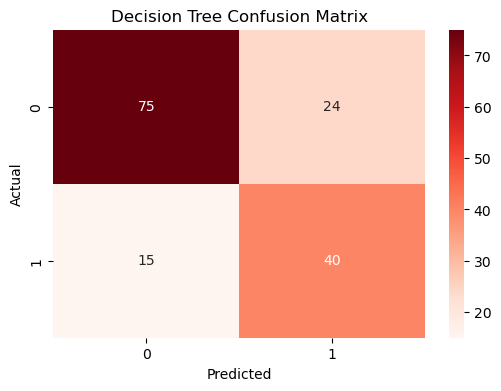

In [15]:
# Decision Tree modeli
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Tahmin ve doğruluk
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
results["Decision Tree"] = dt_accuracy

# Karışıklık matrisi
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Decision Tree Confusion Matrix:")
print(dt_cm)

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Reds")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# Modellerin doğruluk oranlarını yazdır
for model_name, accuracy in results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.7208
SVM Accuracy: 0.7662
Decision Tree Accuracy: 0.7468


SVM Accuracy: 0.7662337662337663
Confusion Matrix:
 [[87 12]
 [24 31]]


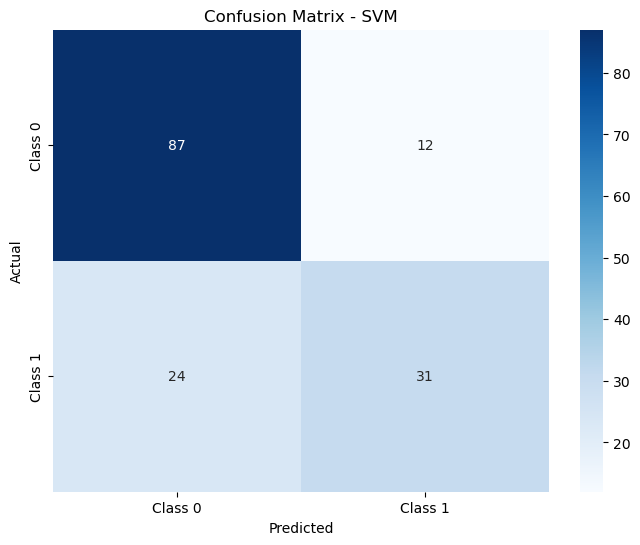


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# SVM modeli oluşturma
svm_model = SVC(kernel='rbf', random_state=42)

# Modeli eğitme
svm_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = svm_model.predict(X_test)

# Doğruluk hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Karışıklık matrisi oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report (isteğe bağlı)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
